In [1]:
from pyspark.sql import SparkSession

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
import seaborn as sns
from scipy import stats
import pymprog as pm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
import csv
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
tickers = ['AAPL','MSFT','AMZN', 'TSLA','TGT','FB','V','WMT','PG','XOM','NSANY','ORCL','COST','CRM','NKE','JNJ','TMO','JPM',
          'UNH','CI','INTC','CSCO','T','KO','DIS','UPS','NFLX','GM','HLT','PFE']
multpl_stocks = web.get_data_yahoo(tickers,start = "2015-01-01", end = "2020-12-31")

In [4]:
multpl_stocks

Attributes   Adj Close                                                   \
Symbols           AAPL        MSFT         AMZN        TSLA         TGT   
Date                                                                      
2015-01-02   24.861401   41.443684   308.519989   43.862000   62.301720   
2015-01-05   24.161013   41.062580   302.190002   42.018002   61.185211   
2015-01-06   24.163294   40.459892   295.290009   42.256001   61.176929   
2015-01-07   24.502111   40.973934   298.420013   42.189999   63.492664   
2015-01-08   25.443539   42.179317   300.459991   42.124001   63.790409   
...                ...         ...          ...         ...         ...   
2020-12-24  131.773087  222.238144  3172.689941  661.770020  174.567688   
2020-12-28  136.486053  224.443069  3283.959961  663.690002  175.763428   
2020-12-29  134.668762  223.634918  3322.000000  665.989990  174.418213   
2020-12-30  133.520477  221.170593  3285.850098  694.780029  173.262344   
2020-12-31  132.492020  221.908905  3256.929932  705.669983  175.902924   

Attributes                                                             ...  \
Symbols             FB           V         WMT          PG        XOM  ...   
Date                                                                   ...   
2015-01-02   78.449997   63.507534   74.555740   74.930771  69.679512  ...   
2015-01-05   77.190002   62.105679   74.338768   74.574486  67.772957  ...   
2015-01-06   76.150002   61.705475   74.911591   74.234802  67.412659  ...   
2015-01-07   76.150002   62.532223   76.899170   74.624222  68.095718  ...   
2015-01-08   78.180000   63.370945   78.522209   75.477577  69.229149  ...   
...                ...         ...         ...         ...        ...  ...   
2020-12-24  267.399994  208.376495  143.500000  136.894287  40.905334  ...   
2020-12-28  277.000000  212.300415  145.220001  137.848526  41.042999  ...   
2020-12-29  276.779999  214.037704  144.300003  137.590088  40.580849  ...   
2020-12-30  271.869995  218.021530  144.179993  136.943985  40.905334  ...   
2020-12-31  273.160004  218.390945  144.149994  138.305771  40.531681  ...   

Attributes      Volume                                                  \
Symbols           INTC        CSCO           T          KO         DIS   
Date                                                                     
2015-01-02  23605600.0  22926500.0  20564000.0   9921100.0   5865400.0   
2015-01-05  32785000.0  29460600.0  30429100.0  26292600.0   7789400.0   
2015-01-06  30847600.0  47297600.0  29595800.0  16897500.0   6793100.0   
2015-01-07  27725200.0  27570800.0  31660000.0  13412300.0   6589500.0   
2015-01-08  31765400.0  40907000.0  22799800.0  21743600.0   7579400.0   
...                ...         ...         ...         ...         ...   
2020-12-24  11865600.0   5720500.0  19153100.0   3265500.0   2721000.0   
2020-12-28  21269200.0  13458400.0  41619500.0   9020500.0  13145400.0   
2020-12-29  84531400.0  11829000.0  36617500.0   8320600.0   6875400.0   
2020-12-30  37385400.0  11043100.0  34347800.0   8142700.0  11680400.0   
2020-12-31  28576800.0  15105500.0  38622300.0   8495000.0   7073500.0   

Attributes                                                            
Symbols           UPS        NFLX          GM        HLT         PFE  
Date                                                                  
2015-01-02  2662900.0  13475000.0   9756700.0  1791667.0  16371571.0  
2015-01-05  3519600.0  18165000.0  16223000.0  2112135.0  24786391.0  
2015-01-06  3808900.0  16037700.0  17747600.0  3422661.0  29468681.0  
2015-01-07  1949500.0   9849700.0  19319200.0  2239425.0  20248816.0  
2015-01-08  2876100.0   9601900.0  15206600.0  2098489.0  49169522.0  
...               ...         ...         ...        ...         ...  
2020-12-24  1006100.0   1144000.0   7825400.0   822400.0  14790100.0  
2020-12-28  1861700.0   2891900.0  10471400.0  1575100.0  26993700.0  
2020-12-29  2864600.0   4022400.0   79

In [9]:
multpl_stocks.head()

Attributes  Adj Close                                                          \
Symbols          AAPL       MSFT        AMZN       TSLA        TGT         FB   
Date                                                                            
2015-01-02  24.861401  41.443684  308.519989  43.862000  62.301720  78.449997   
2015-01-05  24.161013  41.062580  302.190002  42.018002  61.185211  77.190002   
2015-01-06  24.163294  40.459892  295.290009  42.256001  61.176929  76.150002   
2015-01-07  24.502111  40.973934  298.420013  42.189999  63.492664  76.150002   
2015-01-08  25.443539  42.179317  300.459991  42.124001  63.790409  78.180000   

Attributes                                              ...      Volume  \
Symbols             V        WMT         PG        XOM  ...        INTC   
Date                                                    ...               
2015-01-02  63.507534  74.555740  74.930771  69.679512  ...  23605600.0   
2015-01-05  62.105679  74.338768  74.574486  67.772957  ...  32785000.0   
2015-01-06  61.705475  74.911591  74.234802  67.412659  ...  30847600.0   
2015-01-07  62.532223  76.899170  74.624222  68.095718  ...  27725200.0   
2015-01-08  63.370945  78.522209  75.477577  69.229149  ...  31765400.0   

Attributes                                                            \
Symbols           CSCO           T          KO        DIS        UPS   
Date                                                                   
2015-01-02  22926500.0  20564000.0   9921100.0  5865400.0  2662900.0   
2015-01-05  29460600.0  30429100.0  26292600.0  7789400.0  3519600.0   
2015-01-06  47297600.0  29595800.0  16897500.0  6793100.0  3808900.0   
2015-01-07  27570800.0  31660000.0  13412300.0  6589500.0  1949500.0   
2015-01-08  40907000.0  22799800.0  21743600.0  7579400.0  2876100.0   

Attributes                                                 
Symbols           NFLX          GM        HLT         PFE  
Date                                                       
2015-01-02  13475000.0   9756700.0  1791667.0  16371571.0  
2015-01-05  18165000.0  16223000.0  2112135.0  24786391.0  
2015-01-06  16037700.0  17747600.0  3422661.0  29468681.0  
2015-01-07   9849700.0  19319200.0  2239425.0  20248816.0  
2015-01-08   9601900.0  15206600.0  2098489.0  49169522.0  

[5 rows x 180 columns]

In [8]:
#write to csv file function 
#creates a projectcsv.csv file in the Machine Learning project folder 
multpl_stocks.to_csv('projectcsv.csv', index = False)


In [ ]:
# DESCRIPTIVE ANALYSIS 

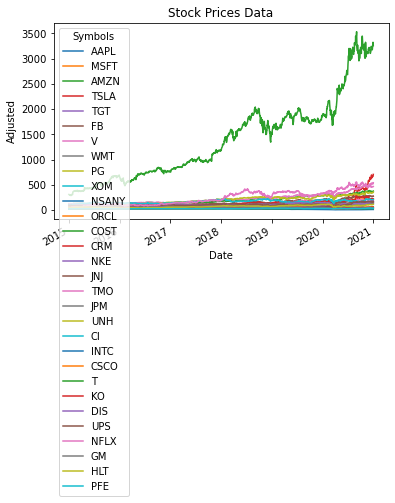

In [5]:
#plotting price trend for all stocks
multpl_stocks['Adj Close'].plot()
plt.xlabel ('Date')
plt.ylabel ('Adjusted')
plt.title ('Stock Prices Data')
plt.savefig('StockPricesData.jpg')
plt.show()

<Figure size 432x288 with 0 Axes>

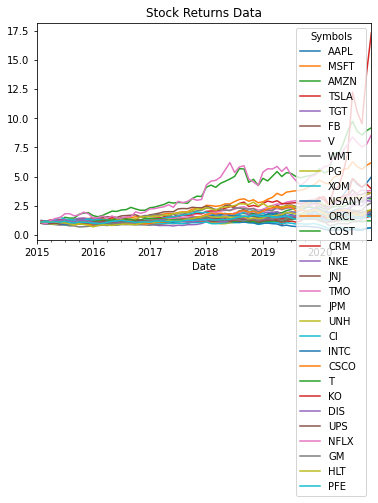

In [9]:
#Calculating amd plotting the returns for the stocks
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.title ('Stock Returns Data')
plt.savefig('StockReturns.jpg')
plt.show()